This notebook is for PyTorch approach to recognizing art styles.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
bs = 16

In [4]:
train_path = Path("./resized/train")
train_path

PosixPath('resized/train')

In [5]:
fnames = get_image_files(train_path)
fnames[:5]

[PosixPath('resized/train/9732.jpg'),
 PosixPath('resized/train/14378.jpg'),
 PosixPath('resized/train/88219.jpg'),
 PosixPath('resized/train/91560.jpg'),
 PosixPath('resized/train/31624.jpg')]

In [6]:
df = pd.read_csv('train_info.csv')
df.head()

,filename,artist,title,style,genre,date
0,102257.jpg,5b39c876740bfc1cfaf544721c43cac3,Uriel,Color Field Painting,abstract,1955.0
1,75232.jpg,5b39c876740bfc1cfaf544721c43cac3,Vir Heroicus Sublimis,Color Field Painting,abstract,1950.0
2,29855.jpg,96e5bc98488ed589b9bf17ad9fd09371,Night March of a Hundred Demons (left half),Yamato-e,mythological painting,NaN
3,62252.jpg,5b39c876740bfc1cfaf544721c43cac3,"Who’s Afraid of Red, Yellow and Blue II",Color Field Painting,abstract,NaN
4,63861.jpg,5b39c876740bfc1cfaf544721c43cac3,Black Fire I,Color Field Painting,abstract,1963.0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79433 entries, 0 to 79432
Data columns (total 6 columns):
filename    79433 non-null object
artist      79433 non-null object
title       79420 non-null object
style       78668 non-null object
genre       78540 non-null object
date        59178 non-null object
dtypes: object(6)
memory usage: 3.6+ MB
None


In [8]:
df["style"].unique().tolist()

['Color Field Painting',
 'Yamato-e',
 'Ukiyo-e',
 'Surrealism',
 'Northern Renaissance',
 'Romanticism',
 'Realism',
 'Biedermeier',
 'Baroque',
 'Cubism',
 'Pointillism',
 'Rococo',
 'High Renaissance',
 'Fauvism',
 'Symbolism',
 nan,
 'Early Renaissance',
 'Classicism',
 'Post-Impressionism',
 'Art Nouveau (Modern)',
 'Mannerism (Late Renaissance)',
 'Expressionism',
 'Japonism',
 'Neoclassicism',
 'Impressionism',
 'Ink and wash painting',
 'Orphism',
 'Neo-Rococo',
 'Orientalism',
 'Magic Realism',
 'Academicism',
 'Naïve Art (Primitivism)',
 'Tonalism',
 'Op Art',
 'Neo-Romanticism',
 'Constructivism',
 'Dada',
 'Neo-Expressionism',
 'Neoplasticism',
 'Abstract Expressionism',
 'Proto Renaissance',
 'Tenebrism',
 'Muralism',
 'Art Informel',
 'Analytical\xa0Realism',
 'Art Brut',
 'Pop Art',
 'Safavid Period',
 'Lyrical Abstraction',
 'Regionalism',
 'Byzantine',
 'Suprematism',
 'Futurism',
 'Abstract Art',
 'Cloisonnism',
 'Concretism',
 'Romanesque',
 'Intimism',
 'Tachisme',


In [9]:
df = df.drop(columns=['artist', 'title','date','genre'])

In [10]:
df = df.dropna()

In [11]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_df(train_path, df, ds_tfms=tfms, size=224, bs=bs//2)
data.classes

/home/toruitas/anaconda3/envs/painter/lib/python3.7/site-packages/fastai/data_block.py:518: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
Environmental (Land) Art
  if getattr(ds, 'warn', False): warn(ds.warn)


['Abstract Art',
 'Abstract Expressionism',
 'Academicism',
 'Action painting',
 'American Realism',
 'Analytical Cubism',
 'Analytical\xa0Realism',
 'Art Brut',
 'Art Deco',
 'Art Informel',
 'Art Nouveau (Modern)',
 'Automatic Painting',
 'Baroque',
 'Biedermeier',
 'Byzantine',
 'Cartographic Art',
 'Classicism',
 'Cloisonnism',
 'Color Field Painting',
 'Conceptual Art',
 'Concretism',
 'Constructivism',
 'Contemporary Realism',
 'Costumbrismo',
 'Cubism',
 'Cubo-Expressionism',
 'Cubo-Futurism',
 'Dada',
 'Divisionism',
 'Early Renaissance',
 'Existential Art',
 'Expressionism',
 'Fantastic Realism',
 'Fauvism',
 'Feminist Art',
 'Figurative Expressionism',
 'Futurism',
 'Gongbi',
 'Gothic',
 'Hard Edge Painting',
 'High Renaissance',
 'Hyper-Realism',
 'Ilkhanid',
 'Impressionism',
 'Indian Space painting',
 'Ink and wash painting',
 'International Gothic',
 'Intimism',
 'Japonism',
 'Joseon Dynasty',
 'Kinetic Art',
 'Kitsch',
 'Lettrism',
 'Light and Space',
 'Luminism',
 'Lyri

In [12]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


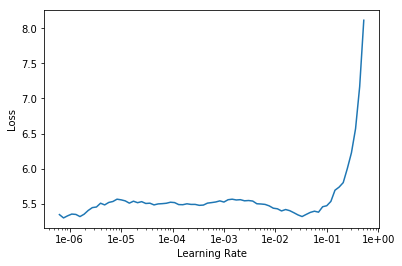

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,time
0,2.759883,2.457594,0.331935,23:15
1,2.685076,6.590642,0.358950,22:19
2,2.532357,9.999887,0.359013,22:33
3,2.462469,6.196154,0.380371,23:42
4,2.423856,17.277882,0.373379,22:32
5,2.386909,12.980211,0.408340,23:28
6,2.292221,9.181005,0.405861,26:00


In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,2.954880,50.543232,0.267671,31:50


In [19]:
len(data.classes)

134

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

In [18]:
interp.most_confused(min_val=50)

[('Post-Impressionism', 'Impressionism', 511),
 ('Romanticism', 'Realism', 389),
 ('Realism', 'Impressionism', 335),
 ('Realism', 'Romanticism', 289),
 ('Impressionism', 'Realism', 271),
 ('Expressionism', 'Impressionism', 203),
 ('Baroque', 'Romanticism', 199),
 ('Romanticism', 'Impressionism', 179),
 ('Rococo', 'Romanticism', 166),
 ('Expressionism', 'Realism', 159),
 ('Symbolism', 'Realism', 153),
 ('Symbolism', 'Impressionism', 150),
 ('Baroque', 'Realism', 129),
 ('Expressionism', 'Art Nouveau (Modern)', 120),
 ('Post-Impressionism', 'Realism', 107),
 ('Neoclassicism', 'Romanticism', 103),
 ('Surrealism', 'Romanticism', 103),
 ('Post-Impressionism', 'Expressionism', 102),
 ('Surrealism', 'Realism', 100),
 ('Art Nouveau (Modern)', 'Realism', 94),
 ('Symbolism', 'Romanticism', 91),
 ('Expressionism', 'Post-Impressionism', 88),
 ('Northern Renaissance', 'Realism', 85),
 ('Art Nouveau (Modern)', 'Expressionism', 81),
 ('Art Nouveau (Modern)', 'Impressionism', 78),
 ('Surrealism', 'Exp